# PROJECT 1
## Supervised learning of the dataset "StudentPerfomanceFactors"


### Overview
In this notebook, we will explore the factors that influence students' performance at school. We will be working with a dataset containing the characteristics of 6,378 students and their respective exam scores. After preparing and analyzing the data, we will implement a regression model followed by a classification model. We will then compare the performance of different models and attempt to identify the factors that influence these scores.

### Importing the librairies


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

%matplotlib inline

### Preparing and exploring the data

In [79]:
df = pd.read_csv("StudentPerformanceFactors.csv", encoding='ISO-8859-1')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Number of students evaluated: 6378
Number of students with grade >= 80: 48
Number of students with grade <= 60: 141


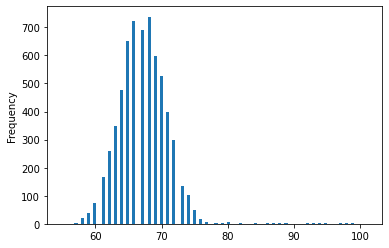

In [80]:
df = df.dropna()
df["Exam_Score"].plot.hist(bins= 100)
print(f'Number of students evaluated: {len(df)}')
print(f'Number of students with grade >= 80: {len(df[df["Exam_Score"] >= 80])}')
print(f'Number of students with grade <= 60: {len(df[df["Exam_Score"] <= 60])}')


We can already observe several things:
- Some of the features are numerical, while others are categorical. The numerical ones need to be scaled so that the model evaluates them with equal importance. For the categorical features, we need to use a method called one-hot encoding, which transforms values like "low," "mid," and "high" into a mathematical form that the model can understand.
- We can also see that the data is quite unbalanced. Most of the exam scores fall between 60 and 80 percent, making it challenging to predict students whose scores belong to the extreme categories. We will explore ways to address this issue.

In [81]:
scaler = MinMaxScaler() 
numerical_features = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']

df = pd.DataFrame(data = df)
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.511628,0.600,Low,High,No,0.500000,0.46,Low,Yes,0.000,Low,Medium,Public,Positive,0.500000,No,High School,Near,Male,67
1,0.418605,0.100,Low,Medium,No,0.666667,0.18,Low,Yes,0.250,Medium,Medium,Public,Negative,0.666667,No,College,Moderate,Female,61
2,0.534884,0.950,Medium,Medium,Yes,0.500000,0.82,Medium,Yes,0.250,Medium,Medium,Public,Neutral,0.666667,No,Postgraduate,Near,Male,74
3,0.651163,0.725,Low,Medium,Yes,0.666667,0.96,Medium,Yes,0.125,Medium,Medium,Public,Negative,0.666667,No,High School,Moderate,Male,71
4,0.418605,0.800,Medium,Medium,Yes,0.333333,0.30,Medium,Yes,0.375,Medium,High,Public,Neutral,0.666667,No,College,Near,Female,70


In [82]:
df = pd.get_dummies(df)
df.head()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,0.511628,0.600,0.500000,0.46,0.000,0.500000,67,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,0.418605,0.100,0.666667,0.18,0.250,0.666667,61,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2,0.534884,0.950,0.500000,0.82,0.250,0.666667,74,False,False,True,...,True,False,False,False,True,False,False,True,False,True
3,0.651163,0.725,0.666667,0.96,0.125,0.666667,71,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,0.418605,0.800,0.333333,0.30,0.375,0.666667,70,False,False,True,...,True,False,True,False,False,False,False,True,True,False


<Axes: >

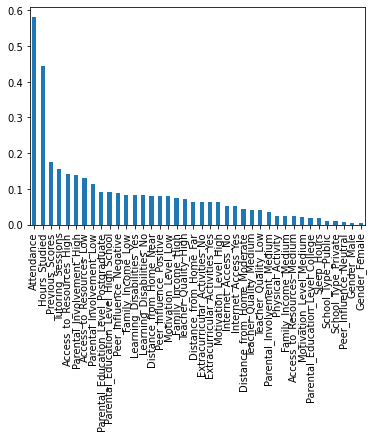

In [83]:
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['Exam_Score'].abs().sort_values(ascending=False)[1:]
correlation_with_target.plot.bar()

In the histogram above, we can see that there are two main features that have the greatest influence on the target (the exam score). If the dataset were too large, we could consider reducing its size by selecting the features that correlate the most with the target. However, in this case, we will keep all the features since the dataset is relatively small.

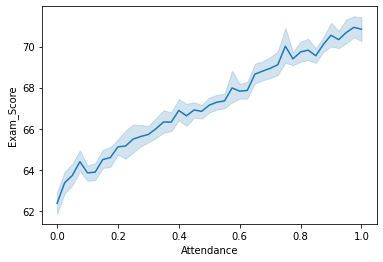

In [84]:
sns.lineplot(x='Attendance', y='Exam_Score', data=df)
plt.show()

The plot above illustrates the influence of the most correlated feature with the exam scores.

### Training the regression models


In [85]:

y = df["Exam_Score"]
X = df.drop("Exam_Score", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
lin_model= LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [87]:
deciTree_model = DecisionTreeRegressor()
deciTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [88]:
y_pred_lin = lin_model.predict(X_test)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

y_pred_deciTree = deciTree_model.predict(X_test)
mae_deciTree = mean_absolute_error(y_test, y_pred_deciTree)



print(f"mae of linear regression: {mae_lin}")
print(f"mae of decision trees: {mae_deciTree}")


mae of linear regression: 0.6092280564263323
mae of decision trees: 1.8777429467084639


[]

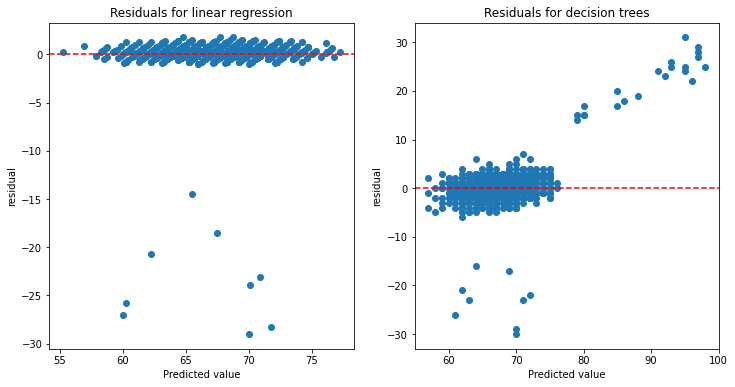

In [89]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].scatter(y_pred_lin, y_pred_lin - y_test)
axs[0].axhline(y=0, color='r', linestyle='--')
axs[0].set_xlabel('Predicted value')
axs[0].set_ylabel('residual')
axs[0].set_title('Residuals for linear regression')

axs[1].scatter(y_pred_deciTree, y_pred_deciTree - y_test)
axs[1].axhline(y=0, color='r', linestyle='--')
axs[1].set_xlabel('Predicted value')
axs[1].set_ylabel('residual')
axs[1].set_title('Residuals for decision trees')

plt.plot()


The linear regression model seems to predict the majority of exam scores well, while the decision tree model struggles with predicting the scores of students who achieved very high exam results. This could be due to the small number of students with scores above 80. We will attempt to implement a technique to address this imbalance in the distribution of exam scores.

### Classification model

In this section, we will explore whether using classification models can improve performance and prediction accuracy.

In [90]:
def categorise(note):
    if note <= 60:
        return 'low'
    elif 60 < note <= 80:
        return 'mid'
    else:
        return 'high'

y = df['Exam_Score'].apply(categorise)
X = df.drop('Exam_Score', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [91]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [99]:

rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)

print("Evaluation of Random Forest model  :")
print("Confusion matrix :")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

print("Evaluation of svm model :")
print("Confusion matrix :")
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

Evaluation of Random Forest model  :
Confusion matrix :
[[   0    0    8]
 [   0    3   29]
 [   0    1 1235]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         8
         low       0.75      0.09      0.17        32
         mid       0.97      1.00      0.98      1236

    accuracy                           0.97      1276
   macro avg       0.57      0.36      0.38      1276
weighted avg       0.96      0.97      0.96      1276

Evaluation of svm model :
Confusion matrix :
[[   0    0    8]
 [   0    1   31]
 [   0    0 1236]]
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         8
         low       1.00      0.03      0.06        32
         mid       0.97      1.00      0.98      1236

    accuracy                           0.97      1276
   macro avg       0.66      0.34      0.35      1276
weighted avg       0.96      0.97      0.96      1276



C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Unde

The overall performance seems to be good, but we must note that 97.2 percent of the data belongs to the same class. We will use a SMOTE algorithm to balance the data and see if that improves the accuracy of the models being studied.

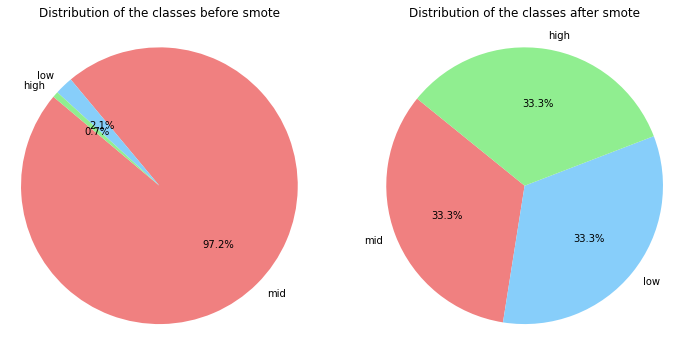

In [98]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

classe_counts = y_train.value_counts()
classe_counts_resampled = y_train_resampled.value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].pie(classe_counts, labels=classe_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
axs[0].axis('equal')
axs[0].set_title('Distribution of the classes before smote')  

axs[1].pie(classe_counts_resampled, labels=classe_counts.index, autopct='%1.1f%%', startangle=141, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
axs[1].axis('equal') 
axs[1].set_title('Distribution of the classes after smote')
plt.show()

In [95]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [96]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [97]:
rf_y_pred = rf_model.predict(X_test)
svm_y_pred = svm_model.predict(X_test)

print("Evaluation of Random Forest model  :")
print("Confusion matrix :")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

print("Evaluation of svm model :")
print("Confusion matrix :")
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

Évaluation du modèle Random Forest :
Matrice de confusion :
[[   0    0    8]
 [   0    3   29]
 [   0    1 1235]]

Rapport de classification :
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         8
         low       0.75      0.09      0.17        32
         mid       0.97      1.00      0.98      1236

    accuracy                           0.97      1276
   macro avg       0.57      0.36      0.38      1276
weighted avg       0.96      0.97      0.96      1276

Évaluation du modèle SVM :
Matrice de confusion :
[[   0    0    8]
 [   0    1   31]
 [   0    0 1236]]

Rapport de classification :
              precision    recall  f1-score   support

        high       0.00      0.00      0.00         8
         low       1.00      0.03      0.06        32
         mid       0.97      1.00      0.98      1236

    accuracy                           0.97      1276
   macro avg       0.66      0.34      0.35      1276
weighted avg   

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1344: Unde

The imbalance of 'low' and 'high' classes in the test set makes it difficult to evaluate performance accurately. In conclusion, we can say that linear regression performed well in predicting the scores for most of the tested data. Using a classification model seems inappropriate for this type of dataset, even after mathematically balancing the number of students in each class. The ideal way to balance the data would be to observe a larger number of students with extreme scores. I hope this project has helped you learn more about supervised prediction methods and that the statistical techniques used have provided a better understanding of the factors influencing students' grades.